In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/LBQS1435-0134/STIS/'

In [5]:
fname = rootdir + 'Old/Unstitched/oco703010_x1d.fits'
spec_data = fits.open(fname)

In [6]:
spec_data.info()

Filename: /Users/thepoetoftwilight/Documents/CUBS/Data/LBQS1435-0134/STIS/Old/Unstitched/oco703010_x1d.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     300   ()      
  1  SCI           1 BinTableHDU    157   29R x 19C   [1I, 1I, 1024D, 1024E, 1024E, 1024E, 1024E, 1024E, 1024E, 1024I, 1E, 1E, 1I, 1E, 1E, 1E, 1E, 1024E, 1E]   


In [7]:
spec_data[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                38946 / width of table in bytes                        
NAXIS2  =                   29 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                   19 / number of fields in each row                   
TTYPE1  = 'SPORDER '           / label for field   1                            
TFORM1  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE2  = 'NELEM   '           / label for field   2                            
TFORM2  = '1I      '           / data format of field: 2-byte INTEGER           
TTYPE3  = 'WAVELENGTH'      

In [10]:
spec_order_1 = spec_data[1].data[-1]
spec_order_2 = spec_data[1].data[-2]

In [13]:
spec_order_wav_1 = spec_order_1[2]
spec_order_flux_1 = spec_order_1[6]
spec_order_err_1 = spec_order_1[7]

spec_order_wav_2 = spec_order_2[2]
spec_order_flux_2 = spec_order_2[6]
spec_order_err_2 = spec_order_2[7]

In [15]:
del_wav_arr = spec_order_wav_1-spec_order_wav_2[0]

In [20]:
del_wav_arr, spec_order_wav_1, spec_order_wav_2

(array([-19.66428854, -19.63157735, -19.5988663 , ...,  13.65564389,
         13.68820211,  13.72076019]),
 array([1984.53576852, 1984.56847971, 1984.60119076, ..., 2017.85570095,
        2017.88825917, 2017.92081725], dtype='>f8'),
 array([2004.20005706, 2004.23309397, 2004.26613073, ..., 2037.85145676,
        2037.88433857, 2037.91722023], dtype='>f8'))

In [17]:
idx = list(del_wav_arr).index(max(del_wav_arr[del_wav_arr<0]))

In [21]:
idx, spec_order_wav_1[idx]

(601, 2004.1680681543126)

In [22]:
spec_order_wav_2_shifted = spec_order_wav_2 + del_wav_arr[idx]

In [24]:
spec_order_wav_2_shifted

array([2004.16806815, 2004.20110507, 2004.23414183, ..., 2037.81946785,
       2037.85234966, 2037.88523132])

In [25]:
spec_order_wav_2_shifted[0:len(spec_order_wav_1[idx:])] = spec_order_wav_1[idx:].copy()

In [26]:
spec_order_wav_1[idx], spec_order_wav_2[idx], spec_order_wav_2_shifted[0]

(2004.1680681543126, 2024.0277343162888, 2004.1680681543126)

(array([103., 103., 103., 102., 102., 102., 102., 102., 102., 102.]),
 array([0.03255808, 0.03257339, 0.0325887 , 0.03260401, 0.03261932,
        0.03263464, 0.03264995, 0.03266526, 0.03268057, 0.03269588,
        0.0327112 ]),
 <BarContainer object of 10 artists>)

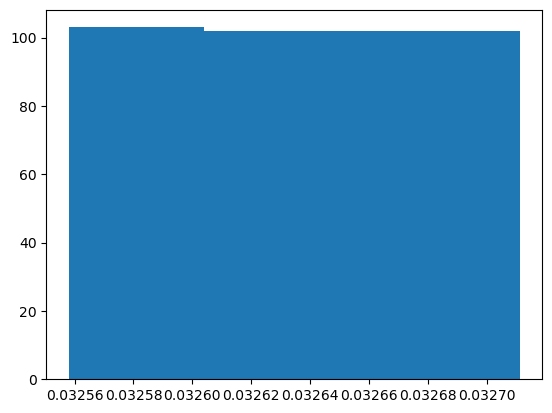

In [27]:
plt.hist(spec_order_wav_1[1:]-spec_order_wav_1[:-1])

In [28]:
spec_order_wav_2

array([2004.20005706, 2004.23309397, 2004.26613073, ..., 2037.85145676,
       2037.88433857, 2037.91722023], dtype='>f8')

(array([103., 103., 103., 102., 102., 102., 102., 102., 102., 102.]),
 array([0.03288166, 0.03289719, 0.03291271, 0.03292824, 0.03294376,
        0.03295929, 0.03297481, 0.03299034, 0.03300586, 0.03302139,
        0.03303691]),
 <BarContainer object of 10 artists>)

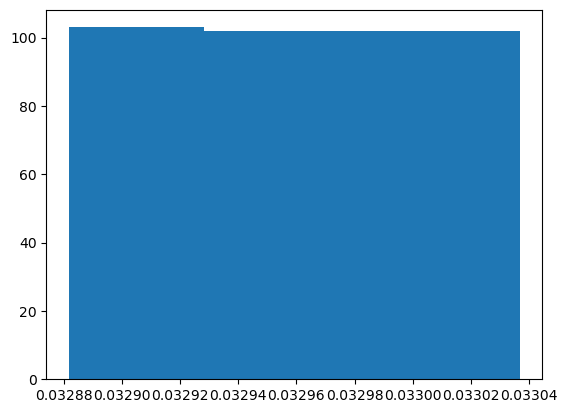

In [37]:
plt.hist(spec_order_wav_2[1:]-spec_order_wav_2[:-1])

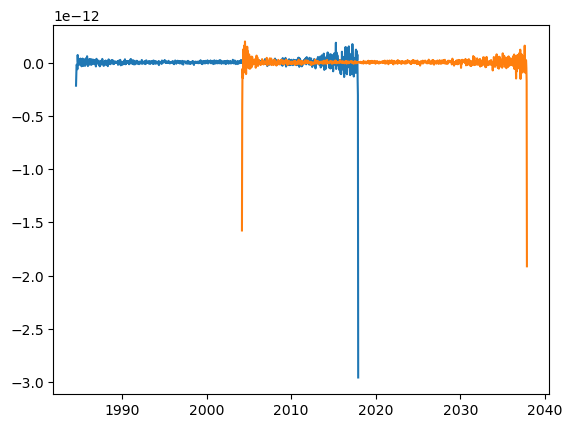

In [29]:
plt.plot(spec_order_wav_1, spec_order_flux_1)
plt.plot(spec_order_wav_2_shifted, spec_order_flux_2)

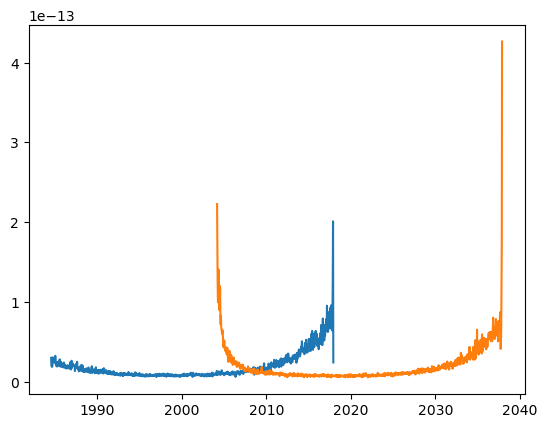

In [30]:
plt.plot(spec_order_wav_1, spec_order_err_1)
plt.plot(spec_order_wav_2_shifted, spec_order_err_2)

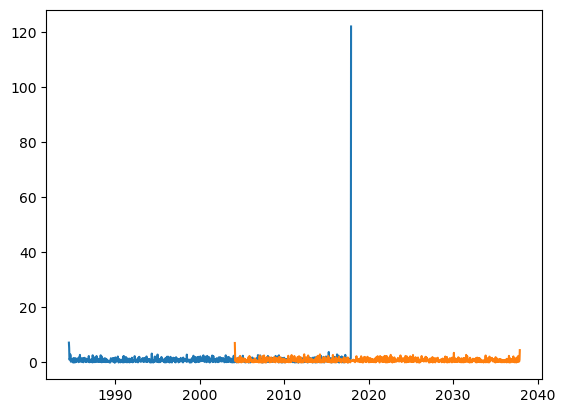

In [31]:
plt.plot(spec_order_wav_1, np.abs(spec_order_flux_1/spec_order_err_1))
plt.plot(spec_order_wav_2_shifted, np.abs(spec_order_flux_2/spec_order_err_2))

In [32]:
wav_dict = {}

for i in range(idx):
    wav_dict[spec_order_wav_1[i]] = []
    
for i in range(len(spec_order_wav_2_shifted)):
    wav_dict[spec_order_wav_2_shifted[i]] = []

In [33]:
for i in range(len(spec_order_wav_1)):
    wav_dict[spec_order_wav_1[i]].append([np.abs(spec_order_flux_1[i]), 
                                          np.abs(spec_order_err_1[i])])
    
for i in range(len(spec_order_wav_2_shifted)):
    wav_dict[spec_order_wav_2_shifted[i]].append([np.abs(spec_order_flux_2[i]), 
                                                  np.abs(spec_order_err_2[i])])

In [42]:
#wav_dict

In [43]:
#for i in range(len(wav_dict)):
#    wav = list(wav_dict.keys())[i]
#    if len(wav_dict[wav])==2:
#        print(wav)

In [44]:
#for i in range(len(spec_order_wav_1)):
#    if spec_order_wav_1[i]>2004 and spec_order_wav_1[i]<2018:
#        idx = np.argmin(np.abs(spec_order_wav_1[i]-spec_order_wav_2_shifted))
#        if spec_order_wav_1[i]==spec_order_wav_2_shifted[idx]:
#            print(spec_order_wav_1[i], spec_order_wav_2_shifted[idx])

In [20]:
wav_stitch = np.concatenate((spec_order_wav_1[:idx], spec_order_wav_2_shifted))

In [21]:
flux_stitch = np.zeros(len(wav_stitch))
err_stitch = np.zeros(len(wav_stitch))
wt_stitch = np.zeros(len(wav_stitch))
wt_stitch_alt = np.zeros(len(wav_stitch))
flux_ratio_stitch = np.zeros(len(wav_stitch))
err_ratio_stitch = np.zeros(len(wav_stitch))

In [22]:
trim = False

In [23]:
for i in range(len(wav_dict)):
    
    wav = wav_stitch[i]
    
    flux_arr = wav_dict[wav]
    
    if(len(flux_arr) == 2):
        
        
        flux_stitch[i] = 0
        err_stitch[i] = 0
        
        if(trim == True):
        
            if(flux_arr[0][1] < flux_arr[1][1]):
            
                flux_stitch[i] = flux_arr[0][0]
                err_stitch[i] = flux_arr[0][1]
            
            else:
            
                flux_stitch[i] = flux_arr[1][0]
                err_stitch[i] = flux_arr[1][1]
                
        else:
            
            F1 = flux_arr[0][0]
            F2 = flux_arr[1][0]
            
            s1 = flux_arr[0][1]
            s2 = flux_arr[1][1]
            
            w1 = s2**2*F1/(s1**2*F2 + s2**2*F1)
            print(w1)
            w1_alt = s2**2/(s1**2+s2**2)
            w2 = 1-w1

            flux_stitch[i] = w1*F1 + w2*F2
            err_stitch[i] = np.sqrt(w1**2*s1**2 + w2**2*s2**2)
            flux_ratio_stitch[i] = F2/F1
            err_ratio_stitch[i] = s2/s1
            wt_stitch[i] = w1
            wt_stitch_alt[i] = w1_alt
    else:
        flux_stitch[i] = flux_arr[0][0]
        err_stitch[i] = flux_arr[0][1]  

0.5068765259939508
0.9213137730815478
0.9502898725879807
0.8000463204363476
0.7638523298213706
0.9115975468685656
0.9524794429545659
0.08488947484793048
0.9584679895191381
0.8537683425255009
0.969983397057912
0.8523920671079755
0.8444120275922954
0.9976288264955263
0.91245084881713
0.6111161678755406
0.91687922935732
0.785958859950216
0.9298241260895154
0.21357272582870457
0.9016450138520917
0.5321971475487557
0.9010628970559681
0.7869431904207254
0.9937981667209734
0.8066502152296179
0.8241886039016807
0.7172464511302122
0.9146813265411198
0.8557647621147733
0.8654459132658248
0.7358796659204453
0.8967112473011886
0.7393157161361684
0.6862162880001665
0.34930845667078725
0.5853760047375187
0.6930836345954645
0.0041972260440609815
0.6328266973788358
0.6655268069996938
0.7950658073466484
0.6975358762203603
0.8752916680959131
0.7891758887752321
0.9388540140822784
0.6185925447701023
0.7716531498098869
0.3866703855848168
0.8251260462259183
0.0016247951926850047
0.8719571908406919
0.8550930

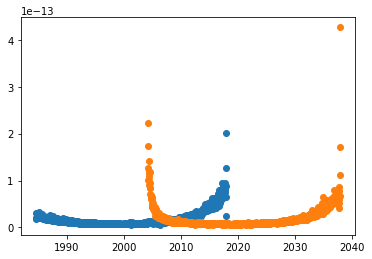

In [24]:
plt.scatter(spec_order_wav_1, spec_order_err_1)
plt.scatter(spec_order_wav_2_shifted, spec_order_err_2)

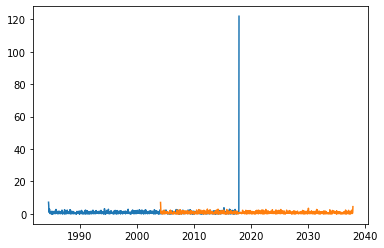

In [25]:
plt.plot(spec_order_wav_1, np.abs(spec_order_flux_1/spec_order_err_1))
plt.plot(spec_order_wav_2_shifted, np.abs(spec_order_flux_2/spec_order_err_2))

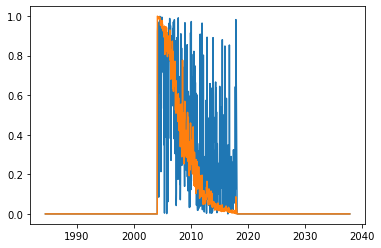

In [26]:
plt.plot(wav_stitch, wt_stitch)
plt.plot(wav_stitch, wt_stitch_alt)

<ipython-input-33-725e94f25586>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(wav_stitch, 1/err_ratio_stitch**2)


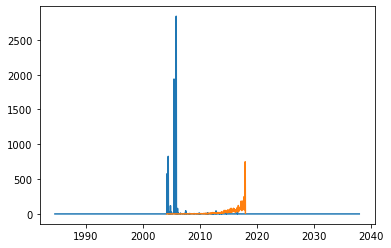

In [33]:
plt.plot(wav_stitch, flux_ratio_stitch)
plt.plot(wav_stitch, 1/err_ratio_stitch**2)

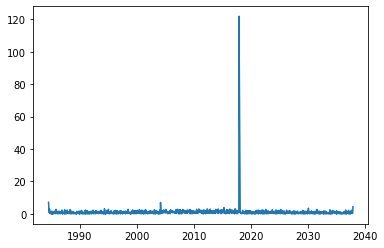

In [28]:
plt.plot(wav_stitch, flux_stitch/err_stitch)

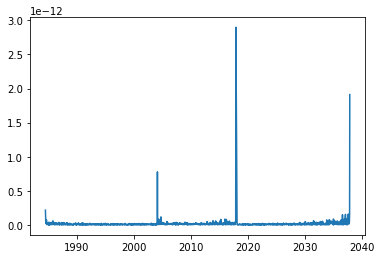

In [29]:
plt.plot(wav_stitch, flux_stitch)

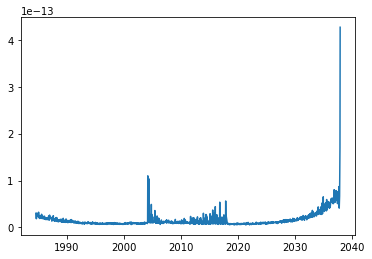

In [30]:
plt.plot(wav_stitch, err_stitch)